In [ ]:
#svm is about the best boundary to seperate the red and green,
#   .            .    |    |    |.              .      . .
#         .         . |    |    |            .            .
#          .        . |    |    |.         . . . .
#    .              . |    |    | .        .         .
#the points on the left and right line are called support vectors because the they only support the classifiation hyper plane in the middle
#svm is very rebillious kind of algorithm because it looks at extreme cases and middle gender and classify them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Social_Network_Ads.csv')
data.head()
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values


In [2]:
from sklearn.cross_validation import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
trainx=sc.fit_transform(trainx)
testx=sc.transform(testx)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(trainx,trainy)
pre=classifier.predict(testx)

In [4]:
pre

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [5]:
testy

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(testy,pre)
cm=confusion_matrix(testy,pre)

In [9]:
score

0.7625

In [11]:
cm

array([[48,  1],
       [18, 13]], dtype=int64)

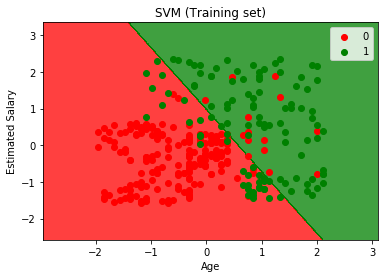

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = trainx, trainy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


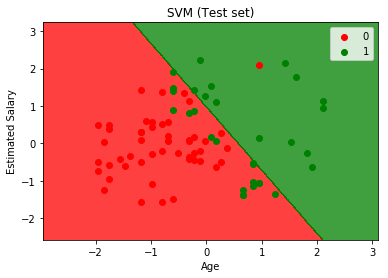

In [14]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = testx, testy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()